# Fourth Step | Get Waveforms
- Download the seismic waveforms from available seismic networks in our study region. The downloaded data is in format of miniseed, and we will transform it into the format of SAC, which is more convenient for us to deal with.

### Reference
- [ObsPy Documentation](https://docs.obspy.org/)

In [1]:
import os
import csv
import obspy

from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client()

In [2]:
datadir = "./"
wdir = "./"
wtdir = f"{wdir}/Download"
if not os.path.exists(f"{wtdir}"): os.mkdir(f"{wtdir}")

In [3]:
# Get stations info
with open(f"{datadir}/stations.txt") as files:
    files.readline()
    stations = []
    for file in files:
        stations.append("{} {} {}".format(file.split("|")[0],file.split("|")[1],file.split("|")[3][0:2]))
    sta_uniq = sorted(set(stations))
    
print(sta_uniq)

['MM HKA HH', 'MM KTA HH', 'MM MDY HH', 'MM NGU HH', 'MM SIM BH', 'MM SIM HH', 'MM TGI HH', 'MM TMU HH', 'MM YGN HH', 'RM SIM BH', 'RM SIM HH', 'TM MHIT BH', 'XR BN01 HH', 'XR MP01 HH', 'XR MP02 HH', 'XR MP03 HH', 'XR MP04 HH', 'XR MP05 HH', 'XR MP06 HH', 'XR MP07 HH', 'XR MP08 HH', 'XR MP09 HH', 'XR MP10 HH', 'XR MP11 HH', 'XR MP13 HH', 'XR MP14 HH', 'XR MP16 HH', 'XR MP18 HH', 'XR MP19 HH', 'XR MP20 HH', 'XR MP21 HH', 'XR MP22 HH', 'XR MP23 HH', 'XR MP25 HH', 'XR MS01 HH', 'XR MS02 HH', 'XR MS03 HH', 'XR MS04 HH', 'XR MS05 HH', 'XR MS06 HH', 'XR MS07 HH', 'XR MS08 HH', 'XR MS09 HH', 'XR MS10 HH', 'XR MS11 HH', 'Z6 BARK EH', 'Z6 JAFL HH', 'Z6 JURI HH']


2019-12-23T06:33:40.312000Z
MM HKA Data is not available!

MM KTA Data is not available!

MM MDY Data is not available!



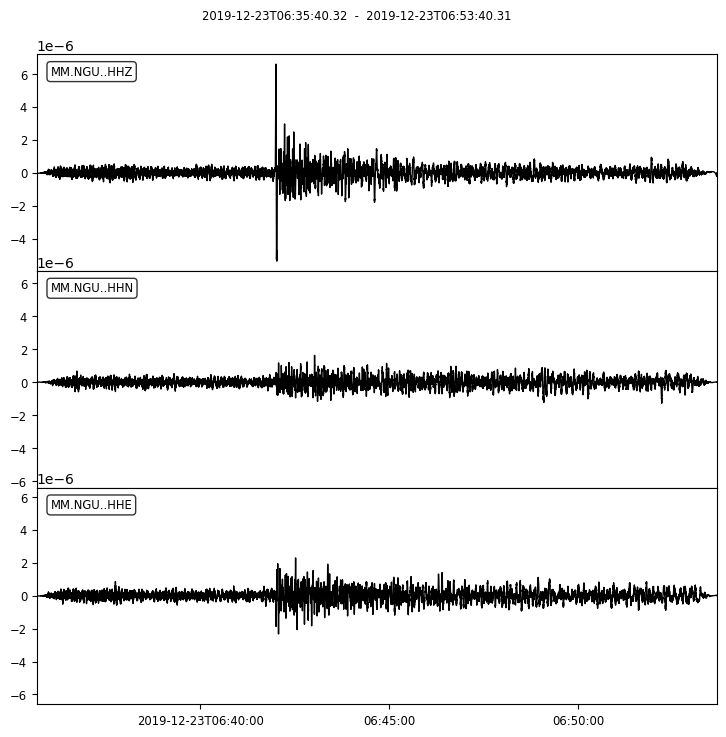

3 Trace(s) in Stream:
MM.NGU..HHE | 2019-12-23T06:35:40.320000Z - 2019-12-23T06:53:40.310000Z | 100.0 Hz, 108000 samples
MM.NGU..HHN | 2019-12-23T06:35:40.320000Z - 2019-12-23T06:53:40.310000Z | 100.0 Hz, 108000 samples
MM.NGU..HHZ | 2019-12-23T06:35:40.320000Z - 2019-12-23T06:53:40.310000Z | 100.0 Hz, 108000 samples                network: MM
               station: NGU
              location: 
               channel: HHE
             starttime: 2019-12-23T06:35:40.320000Z
               endtime: 2019-12-23T06:53:40.310000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 108000
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 525, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 794112})
            processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2019, 12, 23, 6, 5

SystemExit: 

/home/elemento/anaconda3/envs/pygmt/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# Download data 
## References: 
## https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html
## https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.detrend.html
## https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.taper.html
## https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hann.html
## https://docs.obspy.org/packages/autogen/obspy.signal.filter.bandpass.html
catalog = f"{datadir}/events.csv"
with open(catalog, "r") as csvfile:
    events = csv.reader(csvfile, delimiter=',')
    next(events, None)  # Skip the headers
    enum = 0
    for event in events:
        enum += 1
        if (enum == 2):  # Only check nth earthquakes
            t = UTCDateTime(event[0])
            print(t)
            for k,stas in enumerate(sta_uniq):
                net = stas.split()[0]
                sta = stas.split()[1]
                cha = "{}*".format(stas.split()[2])
                try:
                    st = client.get_waveforms(network=net, station=sta, location="*", 
                        channel=cha, starttime=t+120, endtime=t+1200, attach_response=True)
                    st.remove_response(output="VEL") 
                    st.detrend("demean") # Substracting the mean
                    st.detrend("linear") # Subtracting a least squares linear function
                    st.taper(max_percentage=0.05, type='hann')
                    st.filter('bandpass', freqmin=0.05, freqmax=3.0, corners=2, zerophase=True)
                    st.plot() 
                    print(st,st[0].stats)
                    os.sys.exit()
                except Exception:
                    print(f'{net} {sta} Data is not available!\n')

In [5]:
# Save the waveforms in SAC format
for i in range(len(st)):
    cha = st[i].stats.channel
    st[i].write(f"{wtdir}/{t}.{net}.{sta}.{cha}", format='SAC')

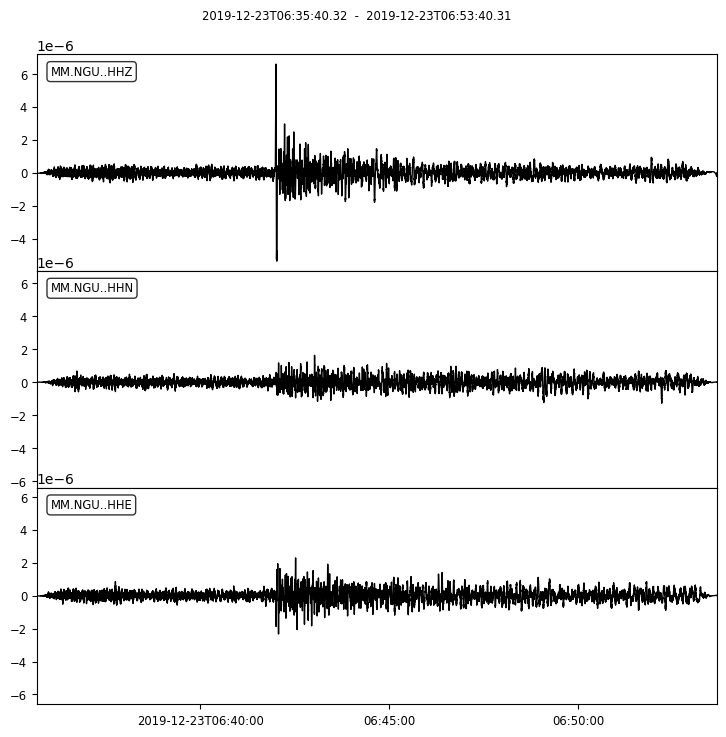

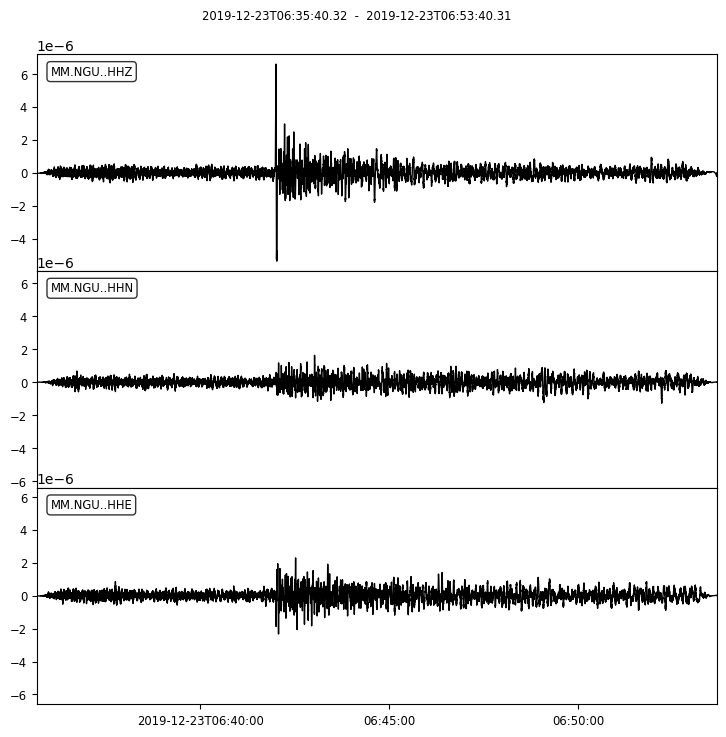

In [6]:
# Read SAC file and show it
tr = obspy.read(f"{wtdir}/{t}*")
tr.plot()